In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Data Retrieval : chargement de données
housing = pd.read_csv('housing.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("housing's shape : ", housing.shape)
# Affichage des 10 premières lignes
housing.head()

housing's shape :  (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# affichage d'informations sur les données 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# dataset consiste de 200640 quartiers et de 10 attributs :
## `longitude` et `latitude`: coordonnées géograophiques            
## `housing_median_age`  : âge médian des logements
## `total_rooms` : nb total de pièces      
## `total_bedrooms` : nb total de chambres    
## `population`          
## `households` : nb de foyers       
## `median_income` : revenu médian      
## `median_house_value`  : valeur médiane des maisons (la variable de sortie à prédire)
## `ocean_proximity` : proximité de l'océan

#`total_bedrooms` : 20433 Non-NulL parmi 20640 observations ==> 207 données manquantes
missing = housing.isna().sum()
print(missing)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
# tous les attributs sont numériques (float64) sauf `ocean_proximity` :

# Print numerical features
num_features = housing.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = housing.select_dtypes(include=[np.object]).columns
print(cat_features)

#`ocean_proximity` : attribut catégorique (object à encoder ultérieurement) contenant les catégories suivantes :
housing["ocean_proximity"].value_counts()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# affichage d'informations statistiques sur les données
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


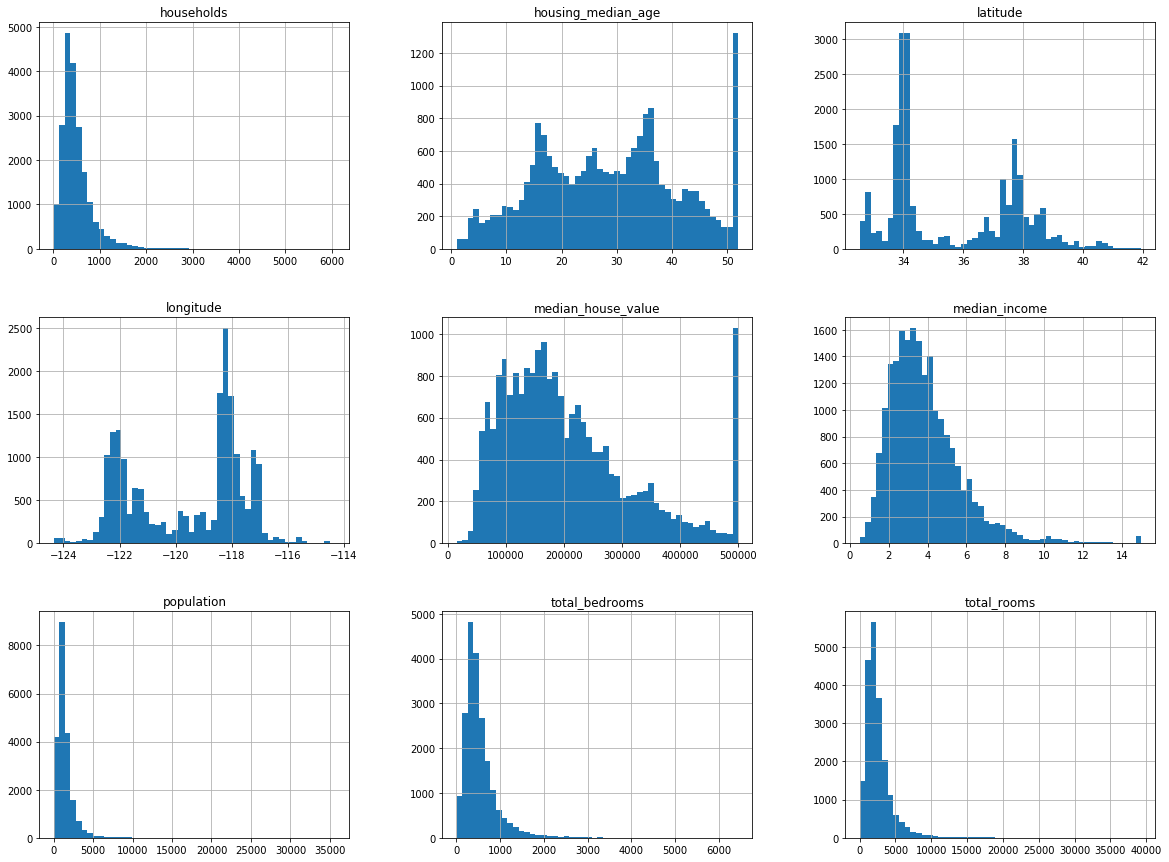

In [7]:
# Visualisation des histogrammes des variables numériques
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Calculer les coefficients `skewness` des attributs
skewness = housing.skew()
print(skewness)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64


In [9]:
# Calculer les coefficients `skewness` des attributs
kurtosis = housing.kurtosis()
print(kurtosis)

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64


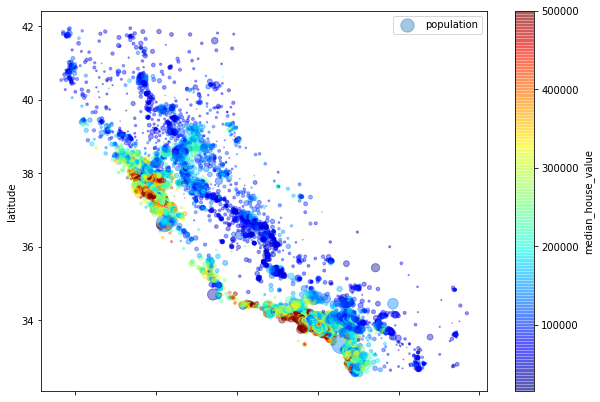

In [10]:
# Visualisation des données pour extraire les informations (insights)
# `alpha' : densité des points
# `s` = taille d'un point qui est propotionnelle à 'population'
# 'c' = couleur d'un point  qui est propotionnel à 'median_house_value' (colormap = 'jet' : du bleu au rouge)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()
# ==> Cette image montre que `median_house_value` est lié à l'emplacement (`ocean_proximity` : 
# plus près de la mer-> logement plus cher) et à `population`.
# ==> La relation entre `population` et `median_house_value` n'est pas si évidente. Explorons leur corrélation !

In [11]:
# La corrélation entre variables aléatoires est une notion de liaison qui contredit leur indépendance. 
# La varation d'une variable aléatoire influe sur les variations des autres variables en cas de corrélation.
# Calculons alors la corrélation entre `population` et `median_house_value` :
housing[['population', 'median_house_value']].corr()
# => corr=-0.02465 : elles sont faiblement corrélées 
# => coor<0 : elles sont inversement propotionnelles ex. Pour un quartier populaire, les logements sont moins chers

,population,median_house_value
population,1.00000,-0.02465
median_house_value,-0.02465,1.00000


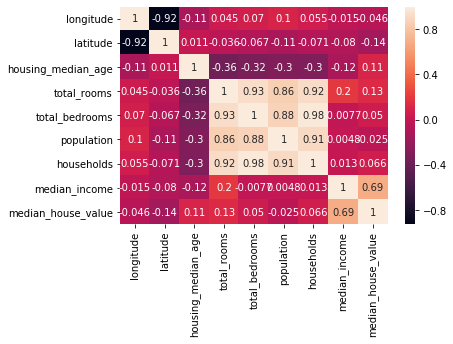

In [12]:
# Corrélation entre les variables
# Étant donné que l'ensemble de données n'est pas trop grand, nous pouvons facilement calculer le coefficient 
# de corrélation de chaque paire de variables ==> matrice 10 x 10 symétrique
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, annot=True)

In [13]:
# Corrélation de `'median_house_value` avec les autres variables
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

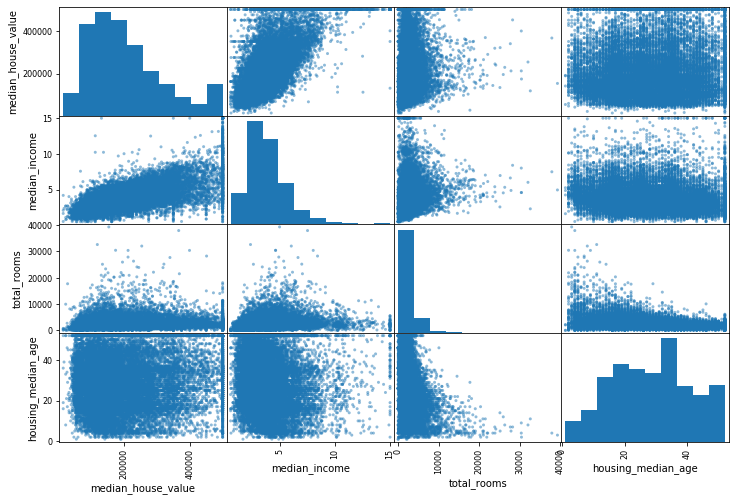

In [14]:
# Prenons les 3 premiers attibuts les plus corrélés avec 'median_house_value'
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

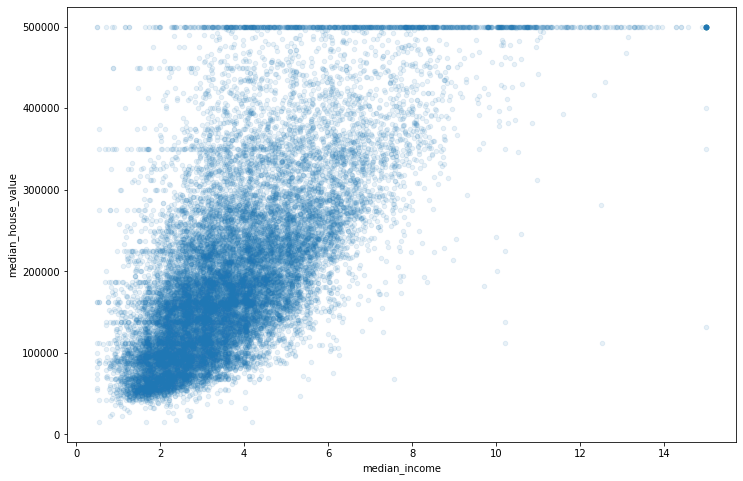

In [15]:
# ==> L'attribut le plus important dans la prédiction de `median_house_value` est `median_income`
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

In [16]:
#Supprimer les lignes dupliquées
housing = housing.drop_duplicates()

# Feature Engineering : Combinaison d'attributs
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

housing.drop(['total_bedrooms'], axis=1, inplace=True)

# vérifiant avec la corrélation
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [17]:
# Pour la séparation, on utilise la fonction train_test_split() de Scikit-Learn :
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1) # input variables (X est une dataframe)
y = housing["median_house_value"].to_numpy() # output variable (y est un vecteur)

# `stratify`  permet de s'assurer que les variables y sont équitablement réparties entre les deux ensembles train et test.
bins = np.linspace(y.min(), y.max(), 100)
y_binned = np.digitize(y, bins)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True, stratify=y_binned,random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (16512, 11) X_test: (4128, 11)


In [18]:
# Nettoyage des données : attribuer des valeurs aux données manquantes
#`total_bedrooms` contient des valeurs manquantes (NULL), nous avons 3 options :

#   + Supprimer les lignes contenant ces valeurs manquantes :
#   housing.dropna(subset='total_bedrooms')

#   + Supprimer l'attribut (colonne) `total_bedrooms` :
# housing.drop('total_bedrooms', axis=1)
     
#   + Affecter à ces données manquantes une certaine valeur (0, moyenne, médiane, etc.)

## Exemple :
from sklearn.impute import SimpleImputer
inputer = SimpleImputer(strategy="mean")
inputer.fit_transform([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [19]:
# Feature scaling : StandardScaler : moyenne = 0 et écart type = 1
from sklearn.preprocessing import StandardScaler
# Génerer une matrice (3x3) avec des valeurs entre 1 et 10
data = np.random.randint(1, 10, (3, 3))
print(data)

scaler = StandardScaler().fit(data)
print("\nmean", scaler.mean_)

data_scaled = scaler.transform(data)
print(data_scaled)

# Nouvelle moyenne 0. et Nouveau écart type 1.
print("\nMoy:", data_scaled.mean(), "Std:", data_scaled.std())

[[6 1 3]
 [1 2 2]
 [8 1 3]]

mean [5.         1.33333333 2.66666667]
[[ 0.33968311 -0.70710678  0.70710678]
 [-1.35873244  1.41421356 -1.41421356]
 [ 1.01904933 -0.70710678  0.70710678]]

Moy: 1.7270135938613546e-16 Std: 1.0


In [20]:
# Encodage des variables catégoriques
from sklearn.preprocessing import OneHotEncoder

data = [["ROUGE"], ["ROUGE"], ["JAUNE"], ["VERT"], ["JAUNE"]]
encoder = OneHotEncoder().fit(data)
data_hot = encoder.transform(data).toarray()

print(data_hot)
print(encoder.categories_)
del data #suppression de data

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[array(['JAUNE', 'ROUGE', 'VERT'], dtype=object)]


In [21]:
# Construire un `pipeline de pré-traitement` qui (1) traite  les valeurs manquantes, transforme les 
# distributions et met en échelle des variables numériques et (2) encode les variable catégoriques

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# Print numerical features
num_features = X_train.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = X_train.select_dtypes(include=[np.object]).columns
print(cat_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


In [22]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), 
                         ("transformer", PowerTransformer(method='yeo-johnson', standardize=True))])
# le full_pipeline applique num_pipeline aux variables numériques et encode les variables catégoriques
full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)])
# Apprendre full_pipeline sur training data
full_pipeline = full_pipeline.fit(X_train)
import joblib
joblib.dump(full_pipeline, "dataPreparation.pkl")

# Appliquer sur les training data et test data
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

print("\n X_train:", X_train.shape, "X_test:", X_test.shape)

# sauvgarder les données préparées
print(X_train[0,:])
features = num_features.to_numpy()
features = np.concatenate((features, ['ocean_1', 'ocean_2', 'ocean_3', 'ocean_4', 'ocean_5', 'median_house_value']), axis=0)
print(features)
# saugarder dans un fichier CSV les données préparées représentées dataframe
print(np.shape(X_train))
print(np.shape(y_train))
df_train = pd.DataFrame(np.concatenate((X_train, y_train[:, np.newaxis]), axis=1), columns=features)
df_train.to_csv('housing_train.csv', index=False)
df_train.head()
# sauvgarder dans un fichier CSV les données préparées représentées dataframe
print(np.shape(X_test))
print(np.shape(y_test))
df_test = pd.DataFrame(np.concatenate((X_test, y_test[:, np.newaxis]), axis=1), columns=features)
df_test.to_csv('housing_test.csv', index=False)
df_test.head()


 X_train: (16512, 15) X_test: (4128, 15)
[-1.30857243  1.05876908  0.82883368 -1.18819343 -1.40850033 -0.8230231
 -0.24550083 -1.26183905  1.32210962 -2.15552052  0.          0.
  0.          1.          0.        ]
['longitude' 'latitude' 'housing_median_age' 'total_rooms' 'population'
 'households' 'median_income' 'rooms_per_household' 'bedrooms_per_room'
 'population_per_household' 'ocean_1' 'ocean_2' 'ocean_3' 'ocean_4'
 'ocean_5' 'median_house_value']
(16512, 15)
(16512,)
(4128, 15)
(4128,)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-0.172830,0.684426,-0.736547,-0.482004,-0.302572,-0.120655,-1.726629,-1.045449,1.449291,-0.489414,0.0,1.0,0.0,0.0,0.0,47500.0
1,-0.123450,-0.488583,-0.084457,0.830651,0.568531,0.908358,0.315593,-0.080205,0.010182,-0.783944,0.0,0.0,0.0,0.0,1.0,395100.0
2,0.222210,0.035660,-0.084457,1.146837,0.953889,1.206860,-0.211090,-0.006154,-0.176556,-0.510929,0.0,1.0,0.0,0.0,0.0,85000.0
3,0.617251,-0.591933,1.120496,-0.566029,-0.487707,-0.459440,0.586153,-0.324347,0.479530,-0.050951,1.0,0.0,0.0,0.0,0.0,209200.0
4,0.543181,-0.756144,-0.993750,-3.363673,-3.809589,-3.937811,1.732088,3.803353,-3.332427,1.515396,1.0,0.0,0.0,0.0,0.0,500001.0


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# chargement des données d'entrainement préparées
df_train = pd.read_csv('housing_train.csv')
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-1.308572,1.058769,0.828834,-1.188193,-1.408500,-0.823023,-0.245501,-1.261839,1.322110,-2.155521,0.0,0.0,0.0,1.0,0.0,237500.0
1,0.567871,-0.635401,1.048089,0.058527,-0.136146,0.127886,-0.193363,-0.146672,0.156685,-0.701974,1.0,0.0,0.0,0.0,0.0,250000.0
2,1.382643,-1.582079,-0.736547,1.393413,1.388602,1.565610,-0.393989,-0.216869,-0.088894,-0.287003,1.0,0.0,0.0,0.0,0.0,135700.0
3,-1.185122,0.890334,-0.243567,0.579701,0.367176,0.547581,0.833637,0.152921,-0.305451,-0.402009,1.0,0.0,0.0,0.0,0.0,287600.0
4,-0.172830,0.660399,1.406965,-0.671689,-0.045317,-0.356069,-1.907723,-0.961184,1.693040,0.888965,0.0,1.0,0.0,0.0,0.0,49600.0


In [24]:
# extraction de X_train (n_samples, n_features) et y_train (target variable)
X_train = df_train.drop("median_house_value", axis=1) 
y_train = df_train["median_house_value"].to_numpy() 
print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

X_train: (16512, 15) ; y_train: (16512,)


In [25]:
# chargement des données d'entrainement préparées
df_test = pd.read_csv('housing_test.csv')
# extraction de X_test et y_test
X_test= df_test.drop("median_house_value", axis=1) 
y_test = df_test["median_house_value"].to_numpy() 
print('X_test:', X_test.shape, '; y_test:', np.shape(y_test))

X_test: (4128, 15) ; y_test: (4128,)


In [26]:
# Commençons par le modèle de base
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
#Création d'une instance (le modèle lin_reg) par le constructeur LinearRegression() 
lin_reg = LinearRegression()
# Apprentissage du modèle par la méthode fit() : Il s'agit d'une approche d'apprentissage
# supervisée puisqu'on utilise lin_reg.fit(X_train, y_train)
lin_reg.fit(X_train, y_train)

#Prédiction des les données d'apprentissage X_train par la méthode .predict()
y_pred = lin_reg.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur les données de test X_test par la méthode .predict()
y_pred = lin_reg.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.6204688258307633  et RMSE= 71110.9593049792
Testing: R2= 0.6266315493783796  et RMSE= 70422.35929706992


In [27]:
from sklearn.tree import DecisionTreeRegressor
# Création d'une instance dt_reg par le constructeur DecisionTreeRegressor()
dt_reg = DecisionTreeRegressor()
# Apprentissage du modèle dt_reg par fit
dt_reg.fit(X_train, y_train)

#Pédiction sur X_train par la méthode predict()
y_pred = dt_reg.predict(X_train)
#Evaluation en calculant les métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = dt_reg.predict(X_test)
#Evaluation en calculant les métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 1.0  et RMSE= 0.0
Testing: R2= 0.6186454895271696  et RMSE= 71171.51419280475


In [28]:
from sklearn.ensemble import RandomForestRegressor
# Création d'une instance par le constructeur RandomForestRegressor()
rf_reg = RandomForestRegressor()
# Apprentissage du modèle rf_reg par la méthode fit()
rf_reg.fit(X_train, y_train)

#Prédiction sur X_train par la méthode predict()
y_pred = rf_reg.predict(X_train)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = rf_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.9742207118346476  et RMSE= 18533.108615302248
Testing: R2= 0.8174359134674192  et RMSE= 49243.55932506298


# Les autre algirithms de Regression

### 1)Ridge regression

In [29]:
from sklearn.linear_model import Ridge
# Création d'une instance par le constructeur Ridge()
ridge_reg = Ridge(alpha=.5)
# Apprentissage du modèle ridge_reg par la méthode fit()
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_train)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = ridge_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.6204662843082068  et RMSE= 71111.1974011052
Testing: R2= 0.6266251973071377  et RMSE= 70422.95833796366


### 2)SVR regression

In [30]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Création d'une instance par le constructeur SVR()

reg_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Apprentissage du modèle reg.svr par la méthode fit()
reg_svr.fit(X_train, y_train)
y_pred = reg_svr.predict(X_train)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = reg_svr.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= -0.04716149194627062  et RMSE= 118118.96748328328
Testing: R2= -0.04686437278710298  et RMSE= 117919.86463560433


### 3) BayesianRidge Regression

In [31]:
from sklearn.linear_model import BayesianRidge
Baye_Ridg_reg =BayesianRidge()
Baye_Ridg_reg.fit(X_train, y_train)
y_pred = Baye_Ridg_reg.predict(X_train)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = Baye_Ridg_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.6204337358769261  et RMSE= 71114.24654826234
Testing: R2= 0.6266111670158337  et RMSE= 70424.2814659988


### 4) Lasso Regression

In [32]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_train)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = lasso_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.6204688066602728  et RMSE= 71110.9611009212
Testing: R2= 0.6266333182710506  et RMSE= 70422.19247828465


/home/oumaima/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34320381015337.82, tolerance: 22000132717.475998
  positive)


### 5)HuberRegressor

In [33]:
from sklearn.linear_model import HuberRegressor


huber_reg = HuberRegressor()

huber_reg.fit(X_train, y_train)
huber_reg.score(X_train, y_train)

y_pred = huber_reg.predict(X_train)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = huber_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.6117263095216436  et RMSE= 71925.31825291066
Testing: R2= 0.6184345095214625  et RMSE= 71191.19888225701


/home/oumaima/.local/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 6) KNeighborsRegressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
neigh_reg = KNeighborsRegressor(n_neighbors=2)
neigh_reg.fit(X_train, y_train)
y_pred = neigh_reg.predict(X_train)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = neigh_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.8983892652103707  et RMSE= 36794.47464164443
Testing: R2= 0.6943509951822693  et RMSE= 63716.69709090765


### 7) GradientBosstingRegressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
Gradaint_reg= GradientBoostingRegressor(random_state=0)

Gradaint_reg.fit(X_train, y_train)

y_pred = Gradaint_reg.predict(X_train)

Gradaint_reg.score(X_test, y_test)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = Gradaint_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.8036421446148703  et RMSE= 51148.97680896986
Testing: R2= 0.7860972437668532  et RMSE= 53302.79130601619


### 8)SGDRegressor

In [36]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Always scale the input. The most convenient way is to use a pipeline.
SGD_reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
SGD_reg.fit(X_train, y_train)
y_pred = SGD_reg.predict(X_train)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = SGD_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= -31211660626.99508  et RMSE= 20392536505.991657
Testing: R2= -31327617728.32669  et RMSE= 20398838862.868935


### 9) BaggingRegressor

In [37]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

Bagging_regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = Bagging_regr.predict(X_train)

#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = Bagging_regr.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= -0.04840336429649428  et RMSE= 118188.9878266597
Testing: R2= -0.04822045690890997  et RMSE= 117996.2152632743


In [38]:
# chargement des données préparées d'entrainement
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# chargement des données d'entrainement préparées
df_train = pd.read_csv('housing_train.csv')
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_1,ocean_2,ocean_3,ocean_4,ocean_5,median_house_value
0,-1.308572,1.058769,0.828834,-1.188193,-1.408500,-0.823023,-0.245501,-1.261839,1.322110,-2.155521,0.0,0.0,0.0,1.0,0.0,237500.0
1,0.567871,-0.635401,1.048089,0.058527,-0.136146,0.127886,-0.193363,-0.146672,0.156685,-0.701974,1.0,0.0,0.0,0.0,0.0,250000.0
2,1.382643,-1.582079,-0.736547,1.393413,1.388602,1.565610,-0.393989,-0.216869,-0.088894,-0.287003,1.0,0.0,0.0,0.0,0.0,135700.0
3,-1.185122,0.890334,-0.243567,0.579701,0.367176,0.547581,0.833637,0.152921,-0.305451,-0.402009,1.0,0.0,0.0,0.0,0.0,287600.0
4,-0.172830,0.660399,1.406965,-0.671689,-0.045317,-0.356069,-1.907723,-0.961184,1.693040,0.888965,0.0,1.0,0.0,0.0,0.0,49600.0


In [39]:
# extraction de X_train et y_train
X_train = df_train.drop("median_house_value", axis=1) 
y_train = df_train["median_house_value"].to_numpy() 
print('X_train:', X_train.shape, '; y_train:', np.shape(y_train))

X_train: (16512, 15) ; y_train: (16512,)


In [1]:
# les modèles testés
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
print(LinearRegression().get_params())
print(DecisionTreeRegressor().get_params())
print(RandomForestRegressor().get_params())
print(BaggingRegressor().get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


NameError: name 'BaggingRegressor' is not defined

In [62]:
# K-fold cross-validation et GridSearchCV
pipelines = []
params = []
names = []


# ajouter LinearRegression
pipelines.append(Pipeline([('clf', LinearRegression())])) ### LinearRegression
params.append({'clf__normalize':[True]})
names.append('LinearRegression')

# ajouter RidgeRegression
pipelines.append(Pipeline([('clf', Ridge(alpha=1.0))])) ## RidgeRegression
params.append({'clf__alpha': [550, 580, 600, 620, 650]})
names.append('Ridge')

# ajouter LassoRegression
pipelines.append(Pipeline([('clf', Lasso())])) ## LassoRegression
params.append({'clf__alpha': [0.005, 0.02, 0.03, 0.05, 0.06]})
names.append('Lasso')

# ajouter DecisionTreeRegressor
pipelines.append(Pipeline([('clf', DecisionTreeRegressor())])) ## DecisionTreeRegressor
params.append({'clf__max_depth':np.linspace(5, 15, 5)})
names.append('DecisionTreeRegressor') 

# ajouter RandomForestRegressor
pipelines.append(Pipeline([('clf', RandomForestRegressor())])) ## RandomForestRegressor
params.append({'clf__n_estimators': [50,100,200]})
names.append('RandomForestRegressor')


# ajouter GradientBoostingRegressor
pipelines.append(Pipeline([('clf', GradientBoostingRegressor())])) ## GradientBoostingRegressor
params.append({'clf__n_estimators': [100,150,200]})
names.append('GradientBoostingRegressor')

# ajouter SGDRegressor
pipelines.append(Pipeline([('clf', SGDRegressor())])) ## SGDRegressor
params.append({'clf__average':[True]})
names.append('SGDRegressor')

# ajouter BaggingRegressor
pipelines.append(Pipeline([('clf', BaggingRegressor())])) ## BaggingRegressor
params.append({'clf__max_samples':[0.5]})
names.append('BaggingRegressor')

# ajouter HuberRegressor
pipelines.append(Pipeline([('clf', HuberRegressor())])) ## HuberRegressor
params.append({'clf__epsilon':[1.0]})
names.append('HuberRegressor')

# ajouter BayesianRidge
pipelines.append(Pipeline([('clf', BayesianRidge())])) ## BayesianRidge
params.append({'clf__tol':[1e-3]})
names.append('BayesianRidge')


# ajouter SVR
pipelines.append(Pipeline([('clf', SVR())])) ## SVR
params.append({'clf__epsilon':[0.1,0.3,0.5]})
names.append('SVR')

TypeError: append() takes exactly one argument (0 given)

In [63]:
# l'enraînement avec cross-validation

#n_jobs = -1 signifie que le calcul sera distribué sur tous les CPU de l'ordinateur.

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,y)  
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # training sur tout training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

LinearRegression R2: 0.618875867228582
Ridge R2: 0.6133523005356671


/home/oumaima/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37034844915290.22, tolerance: 22000132717.475998
  positive)


Lasso R2: 0.618876867103072


/home/oumaima/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37034844915290.22, tolerance: 22000132717.475998
  positive)


DecisionTreeRegressor R2: 0.7171555969937067
RandomForestRegressor R2: 0.8095403702976498


IndexError: list index out of range

In [60]:
from sklearn.metrics import mean_squared_error, r2_score 

# chargement des données d'entrainement préparées
df_test = pd.read_csv('housing_test.csv')

# extraction de X_test et y_test
X_test= df_test.drop("median_house_value", axis=1) 
y_test = df_test["median_house_value"].to_numpy() 
print('X_test:', X_test.shape, '; y_test:', np.shape(y_test))

# Evaluation

for i, estimator in enumerate(estimators):
    print('\nPerformance :', names[i])
    y_pred = estimator.predict(X_test)
    print('\n mean_squared_error :', mean_squared_error(y_test, y_pred))    
    print('\n r2_score :', r2_score(y_test, y_pred))

X_test: (4128, 15) ; y_test: (4128,)

Performance : LinearRegression

 mean_squared_error : 4959001131.132267

 r2_score : 0.6266547042975253

Performance : Ridge

 mean_squared_error : 4997994606.759952

 r2_score : 0.6237190262640417

Performance : Lasso

 mean_squared_error : 4959286015.068817

 r2_score : 0.626633256414228

Performance : DecisionTreeRegressor

 mean_squared_error : 3773761243.6876516

 r2_score : 0.7158871373127893

Performance : RandomForestRegressor

 mean_squared_error : 2439988096.4691424

 r2_score : 0.8163021033272491

Performance : GradientBoostingRegressor

 mean_squared_error : 2550517468.937364

 r2_score : 0.8079807458286805

Performance : SGDRegressor

 mean_squared_error : 4966428983.878235

 r2_score : 0.6260954880750349

Performance : BaggingRegressor

 mean_squared_error : 2823512098.3102717

 r2_score : 0.7874279655543304

Performance : HuberRegressor

 mean_squared_error : 5217980550.585922

 r2_score : 0.6071570785902484

Performance : BayesianRi

In [61]:
# Serialize final models 
import joblib  
for i, estimator in enumerate(estimators):
    joblib.dump(estimator, names[i]+".pkl")


# chargement du modèle linear regression
# model = joblib.load(names[0]+"pkl")